# GeoPandas User Survey 2020

In the fall of 2020, we have asked our community for feedback. We had three main goals:

- Better understand the GeoPandas community
- Better identify common use cases
- Better identify gaps (in documentation, performance, etc.)

Below is a summary of the non-sensitive questions we have asked.

We have collected 200 responses, thank you all!

In [1]:
# %load_ext lab_black

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set_style("white")
sns.set_palette(["#139C5A"])

# plt.rcParams["figure.dpi"] = 72

In [4]:
responses = pd.read_csv("data/2020.csv")

## A bit about the respondents

The first section aims to understand the community, how people use GeoPandas and why.

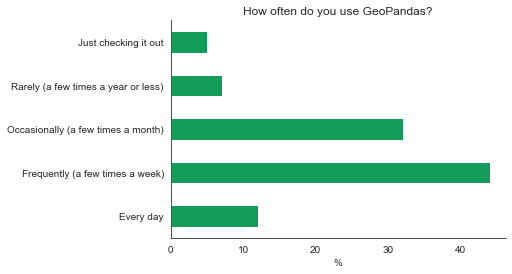

In [5]:
(
    pd.Categorical(
        responses.iloc[:, 1],
        ordered=True,
        categories=[
            "Every day",
            "Frequently (a few times a week)",
            "Occasionally (a few times a month)",
            "Rarely (a few times a year or less)",
            "Just checking it out",
        ],
    ).value_counts()
    / responses.shape[0]
    * 100
).plot.barh(title=responses.iloc[:, 1].name).set(xlabel="%")
sns.despine()

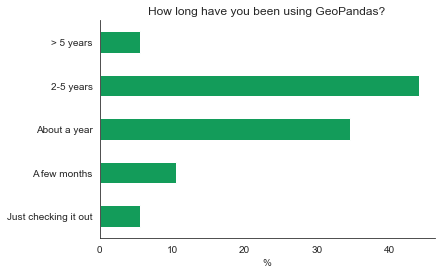

In [6]:
(
    pd.Categorical(
        responses.iloc[:, 2],
        ordered=True,
        categories=[
            "Just checking it out",
            "A few months",
            "About a year",
            "2-5 years",
            "> 5 years",
        ],
    ).value_counts()
    / responses.shape[0]
    * 100
).plot.barh(title=responses.iloc[:, 2].name).set(xlabel="%")
sns.despine()

It looks that most of the respondents have been using GeoPandas for a while and very often.

In [7]:
def split_and_explode(s):
    return s.str.replace(", ", ",").str.split(",").explode().to_frame()

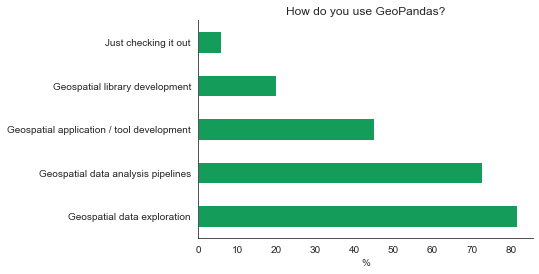

In [8]:
(
    pd.Categorical(
        split_and_explode(responses.iloc[:, 3]).iloc[:, 0],
        categories=[
            "Geospatial data exploration",
            "Geospatial data analysis pipelines",
            "Geospatial application / tool development",
            "Geospatial library development",
            "Just checking it out",
        ],
    ).value_counts()
    / responses.shape[0]
    * 100
).plot.barh(title=responses.iloc[:, 3].name).set(xlabel="%")
sns.despine()

Almost everyone does some data exploration and data analysis. About half of the people build other tools and libraries on top of GeoPandas. That is worth keeping in mind since any deprecation can cause troubles in downstream.

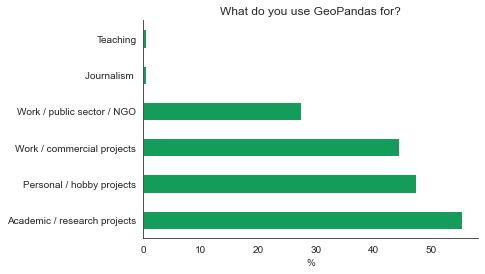

In [9]:
(
    split_and_explode(responses.iloc[:, 4]).iloc[:, 0].value_counts()
    / responses.shape[0]
    * 100
).plot.barh(title=responses.iloc[:, 4].name).set(xlabel="%")
sns.despine()

People use GeoPandas in a range of contexts in a pretty balanced way.

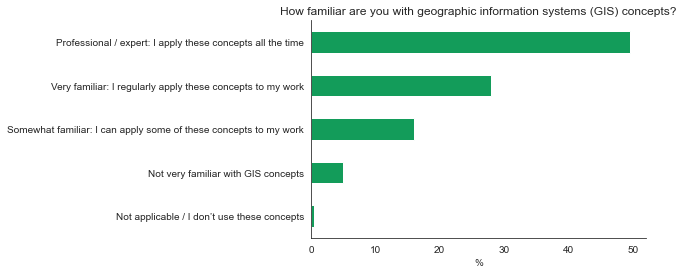

In [10]:
cats = [
    "Professional / expert: I apply these concepts all the time",
    "Very familiar: I regularly apply these concepts to my work",
    "Somewhat familiar: I can apply some of these concepts to my work",
    "Not very familiar with GIS concepts",
    "Not applicable / I don’t use these concepts",
]
cats.reverse()
(
    pd.Categorical(
        responses.iloc[:, 5],
        ordered=True,
        categories=cats,
    ).value_counts()
    / responses.shape[0]
    * 100
).plot.barh(
    title="How familiar are you with geographic information systems (GIS) concepts?"
).set(
    xlabel="%"
)
sns.despine()

About 77% of respondents are very familiar with GIS concepts such as spatial reference systems, spatial predicates (e.g., intersects, touches), spatial operations (e.g., intersection, overlay, nearest neighbor), and spatial data types. We know that the results are skewed towards a more active community. Therefore the real number will be probably a bit smaller. However, it is excellent to understand what the level is when we write the documentation.

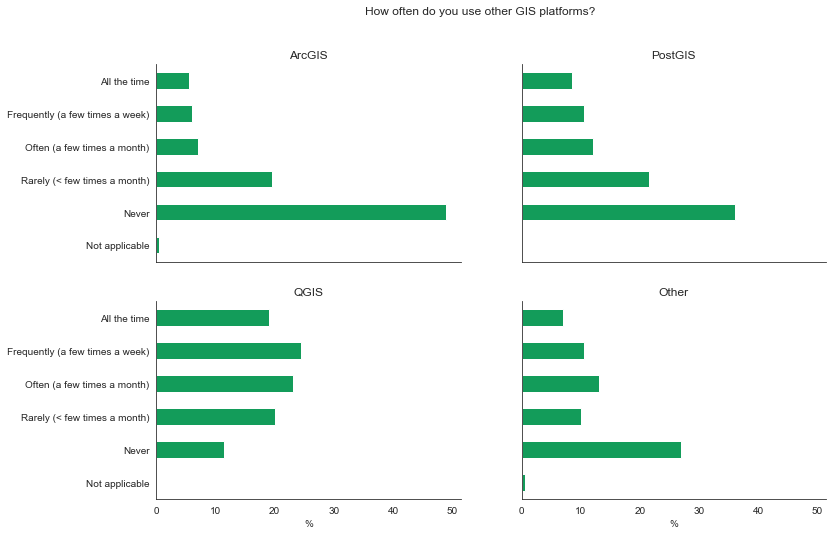

In [11]:
cats = [
    "All the time",
    "Frequently (a few times a week)",
    "Often (a few times a month)",
    "Rarely (< few times a month)",
    "Never",
    "Not applicable",
]
cats.reverse()

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12, 8))
fig.suptitle(responses.iloc[:, 6].name[:41])
(
    pd.Categorical(responses.iloc[:, 6], ordered=True, categories=cats).value_counts()
    / responses.shape[0]
    * 100
).plot.barh(ax=axs[0, 0], title=responses.iloc[:, 6].name[43:-1]).set(xlabel="%")
(
    pd.Categorical(responses.iloc[:, 7], ordered=True, categories=cats).value_counts()
    / responses.shape[0]
    * 100
).plot.barh(ax=axs[0, 1], title=responses.iloc[:, 7].name[43:-1]).set(xlabel="%")
(
    pd.Categorical(responses.iloc[:, 8], ordered=True, categories=cats).value_counts()
    / responses.shape[0]
    * 100
).plot.barh(ax=axs[1, 0], title=responses.iloc[:, 8].name[43:-1]).set(xlabel="%")
(
    pd.Categorical(responses.iloc[:, 9], ordered=True, categories=cats).value_counts()
    / responses.shape[0]
    * 100
).plot.barh(ax=axs[1, 1], title=responses.iloc[:, 9].name[43:-1]).set(xlabel="%")
sns.despine()

Almost everyone uses some other GIS platforms. We are happy to see that the tendency is to choose other open-source solutions!

In [12]:
options = [
    "Spatial index",
    "GIS database I/O (e.g., PostGIS)",
    "GIS file I/O (reading / writing spatial formats)",
    "Predicate operations (intersects, contains, within, etc)",
    "Set operations (intersection, union, etc)",
    "Geometric aggregation (dissolve, etc)",
    "Spatial join / clip / overlay",
    "Coordinate transformation (re-projection to another CRS)",
    "Plotting",
    "Geocoding",
]

In [13]:
counts = {}
for option in options:
    counts[option] = (
        responses.iloc[:, 10].str.contains(option, regex=False).sum()
        / responses.shape[0]
        * 100
    )

## How is GeoPandas used?

The second section aims to understand which bits of GeoPandas people use and other parts of the ecosystem linked to it.

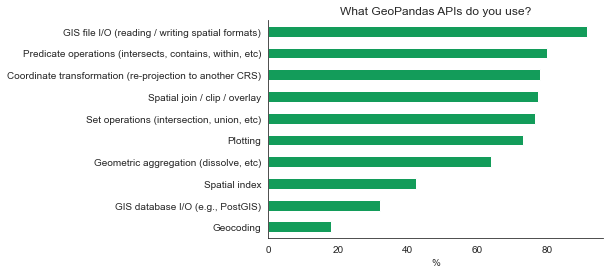

In [14]:
pd.Series(counts).sort_values().plot.barh().set(
    xlabel="%", title=responses.iloc[:, 10].name
)
sns.despine()

People tend to use a broad spectrum of tools GeoPandas offers. Understandably, geocoding is not as widely adopted because not everyone actually needs it.

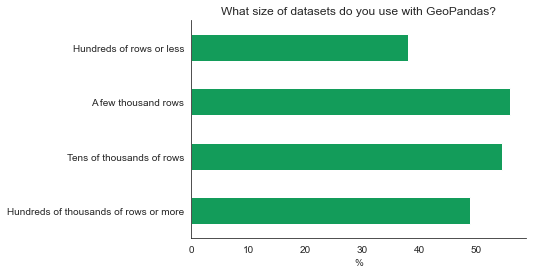

In [15]:
(
    pd.Categorical(
        split_and_explode(responses.iloc[:, 11]).iloc[:, 0],
        categories=[
            "Hundreds of thousands of rows or more",
            "Tens of thousands of rows",
            "A few thousand rows",
            "Hundreds of rows or less",
        ],
        ordered=True,
    ).value_counts()
    / responses.shape[0]
    * 100
).plot.barh(title=responses.iloc[:, 11].name).set(xlabel="%")
sns.despine()

`geopandas.GeoDataFrames` are of all sizes. Notably, almost half of the respondents use very large datasets, so performance is essential.

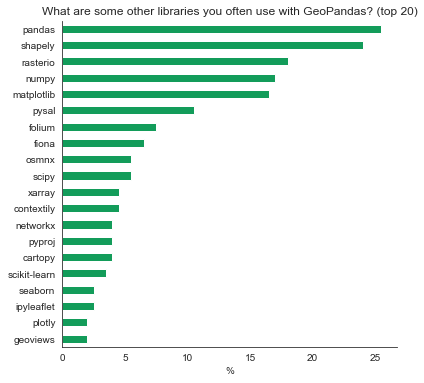

In [16]:
(
    split_and_explode(responses.iloc[:, 12])
    .iloc[:, 0]
    .str.lower()
    .value_counts(ascending=True)
    / responses.shape[0]
    * 100
).drop("").tail(20).plot.barh(
    title=responses.iloc[:, 12].name + " (top 20)", figsize=(6, 6)
).set(
    xlabel="%"
)
sns.despine()

Almost 20% of users mentioned `rasterio` and `xarray` among other libraries they use, therefore Interoperability between GeoPandas vector data and raster is quite relevant.

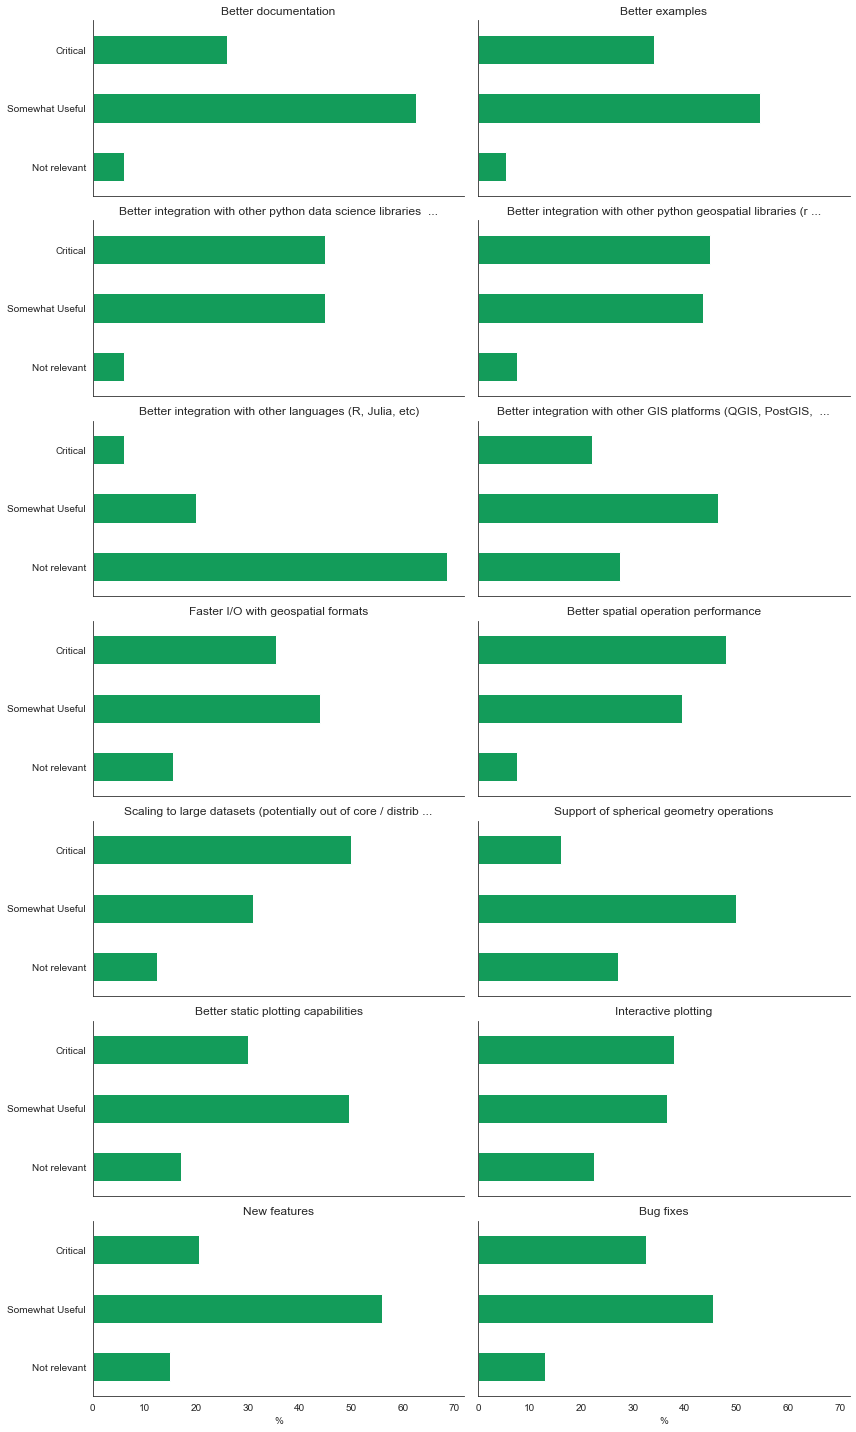

In [17]:
cats = ["Not relevant", "Somewhat Useful", "Critical"]

fig, axs = plt.subplots(7, 2, sharex=True, sharey=True, figsize=(12, 20))
# fig.suptitle(responses.iloc[:, 13].name[:59])
for ax, i in zip(axs.reshape(-1), range(13, 27)):
    title = responses.iloc[:, i].name[61:-1]
    if len(title) > 60:
        title = title[:60] + " ..."
    (
        pd.Categorical(
            responses.iloc[:, i], ordered=True, categories=cats
        ).value_counts()
        / responses.shape[0]
        * 100
    ).plot.barh(ax=ax, title=title).set(xlabel="%")
plt.tight_layout()
sns.despine()

Performance, scaling to large datasets, interactive plotting and integration with the rest of the Python ecosystem are the outstanding topics. 

Existing experimental `pygeos` geometry backend, which will be embedded in `shapely 2.0` already provides a considerable performance gain, so we're optimistic. 

Scaling, parallelization and out-of-core computation are also on the roadmap, based on `dask`. See https://github.com/jsignell/dask-geopandas and help us test and code the first release!

There's a variety of external libraries building on top of GeoPandas, providing interactive plotting but we may look into closer cooperation. 

## Environment and installation

In some cases, the installation of GeoPandas may not be entirely straightforward. We wanted to understand which combinations of OS and environment management are the tricky one.

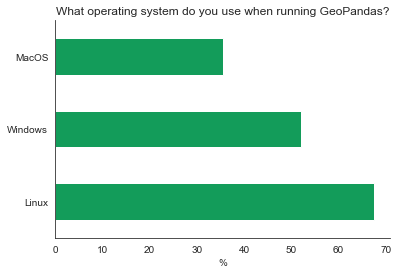

In [18]:
(
    pd.Categorical(
        split_and_explode(responses.iloc[:, 28]).iloc[:, 0],
        categories=["Linux", "Windows", "MacOS"],
    ).value_counts()
    / responses.shape[0]
    * 100
).plot.barh(title=responses.iloc[:, 28].name).set(xlabel="%")
sns.despine()

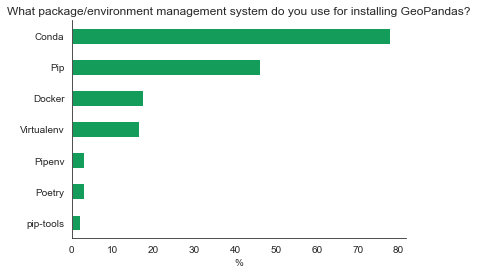

In [19]:
(
    split_and_explode(responses.iloc[:, 29]).iloc[:, 0].value_counts(ascending=True)[6:]
    / responses.shape[0]
    * 100
).plot.barh(title=responses.iloc[:, 29].name).set(xlabel="%")
sns.despine()

`conda` is the recommended option, we're glad that the vast majority of people use it. 

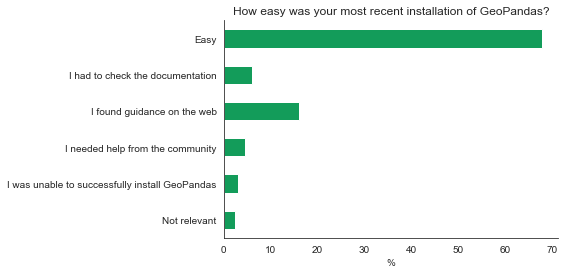

In [20]:
cats = [
    "Easy",
    "I had to check the documentation",
    "I found guidance on the web",
    "I needed help from the community",
    "I was unable to successfully install GeoPandas",
    "Not relevant",
]
cats.reverse()
(
    pd.Categorical(responses.iloc[:, 30], categories=cats).value_counts()
    / responses.shape[0]
    * 100
).plot.barh(title=responses.iloc[:, 30].name).set(xlabel="%")
sns.despine()

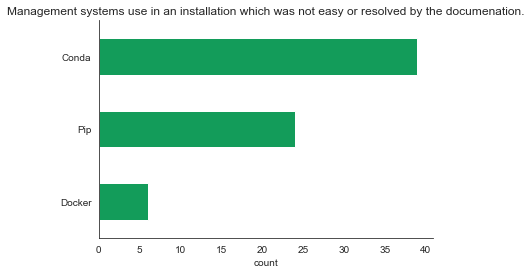

In [21]:
install = pd.Categorical(responses.iloc[:, 30], categories=cats)
(
    split_and_explode(responses[install.isin(install.categories[1:4])].iloc[:, 29])
    .iloc[:, 0]
    .value_counts(ascending=True)[6:]
).plot.barh(
    title="Management systems use in an installation which was not easy or resolved by the documenation."
).set(
    xlabel="count"
)
sns.despine()

Although causing a bit of trouble for some, the installation seems to be currently an easy task for most. Interestingly, there's no difference between `pip` and `conda` regarding the installation troubles, the ratio remains the same as in all installations.

When you mentioned what caused the issue, `GDAL`, used by `fiona` was often the culprit. 

## GeoPandas community

The final part of the survey is about the wider community.

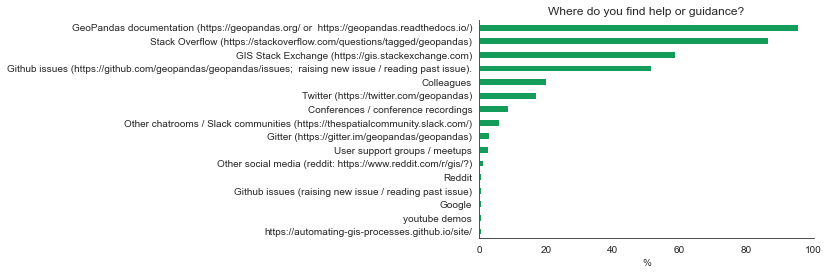

In [22]:
(
    split_and_explode(responses.iloc[:, 32]).iloc[:, 0].value_counts(ascending=True)
    / responses.shape[0]
    * 100
).plot.barh(title=responses.iloc[:, 32].name).set(xlabel="%")
sns.despine()

The documentation, [StackOverflow](https://stackoverflow.com/questions/tagged/geopandas) and [GIS StackExchange](https://gis.stackexchange.com/questions/tagged/geopandas), together with GitHub issues, are among the primary sources of help and guidance.

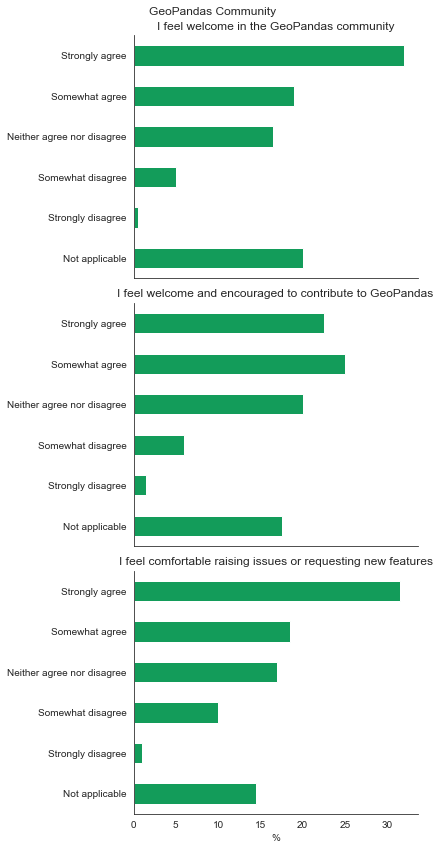

In [23]:
cats = [
    "Strongly agree",
    "Somewhat agree",
    "Neither agree nor disagree",
    "Somewhat disagree",
    "Strongly disagree",
    "Not applicable",
]
cats.reverse()
fig, axs = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(6, 12))
fig.suptitle(responses.iloc[:, 33].name[:19])
for ax, i in zip(axs.reshape(-1), range(33, 36)):
    (
        pd.Categorical(
            responses.iloc[:, i], ordered=True, categories=cats
        ).value_counts()
        / responses.shape[0]
        * 100
    ).plot.barh(ax=ax).set(xlabel="%")
    ax.set_title(responses.iloc[:, i].name[21:-1])
plt.tight_layout()
sns.despine()

People tend to feel welcome in the community, but there seems to be space to become more inclusive.

Finally, we have asked whether you would recommend GeoPandas and 77% agree (with 8% responding as NA).

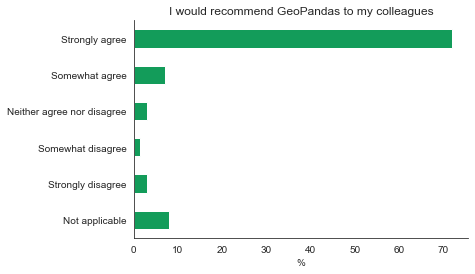

In [26]:
(
    pd.Categorical(responses.iloc[:, 36], ordered=True, categories=cats).value_counts()
    / responses.shape[0]
    * 100
).plot.barh(title=responses.iloc[:, 36].name[21:-1]).set(xlabel="%")
sns.despine()

Thank you all for your time and valuable responses.